## **COMP4082 - Autonomous Robotic Systems**
---

**Student Name:** Anshali Manoharan

**Student ID:** 20506330

---

#### Research Question 1:
Does the choice of noise type affect the mutation process of the baseline Genetic Algorithm with Multi-Step Mutation (GA-MSM) and (GA-MSM-P), particularly non-Gaussian noise types (e.g., OU, pink)? If so, how does different types of noise influences  convergence performance in policy networks evolved using GAs, compared to the standard Gaussian noise?

_Note: Since a new addition to the algorithm was found to be statistically significantly better, the experiment includes both GA-MSM and the GA-MSM-P version in this experiment._

#### This notebook will carry out the necessary experimentation and analysis required to answer this research question.

#### Steps:

1. Perform 10 runs of the GA-MSM algorithm with default Gaussian noise mutation operator.
2. Perform 10 runs of the GA-MSM algorithm with pink noise mutation operator.
3. Perform 10 runs of the GA-MSM algorithm with OU noise mutation operator.
4. For each noise type, median scores of the 10 runs are calculated across 200 generations.
5. Pairwise Mann Whitney U significance tests performed between Gaussian & Pink, Gaussian & OU, and Pink & OU.
6. Repeat for GA-MSM-P.

#### Summary of Findings:



Effect of Noise Types on GA-MSM-P & GA-MSM

| Comparison      | (GA-MSM) Statistically Significant? |   (GA-MSM-P) Statistically Significant? | 
|:----------------|:--------------------------:|:--------------------------:|
| Gaussian vs Pink|  No                        |  No                   |
| Gaussian vs OU  |  Yes                        |  Yes                        | 
| Pink vs OU      |  Yes                        |  Yes                        |

---

#### Part 1: Install all necessary dependencies
- This part installs the necessary Python libraries: `gymnasium`, `tensorflow`, `colorednoise`, `matplotlib`, `numpy`, and `uuid`.
- The `os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'` suppresses TensorFlow logs for CPU optimization messages to reduce unnecessary output.



In [1]:
!pip install gymnasium tensorflow colorednoise matplotlib numpy uuid prettytable pandas openpyxl

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: cm-create-image master has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of cm-create-image or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 22.0.4 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip


In [2]:
import os

# The code execution occurred on a CPU.
# As a result, TensorFlow logs related to optimizations for CPU architecture
# (e.g., AVX2, FMA) were suppressed.

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

#### Part 2. All necessary imports
- Imports standard libraries such as `numpy`, `random`, and `matplotlib` for numerical computations, random processes, and plotting.
- Imports TensorFlow's `keras` submodules for deep learning functionalities.
- `gymnasium` is imported to work with reinforcement learning environments.
- Additional modules like `colorednoise`, `joblib`, `uuid`, `time` and `prettytable` are included for noise generation, parallel processing, unique ID creation for the models created during parallel processing, time-related operations and data visualisation.
- Custom modules (`populationGenerator`, `crossOverOperator`, `fitnessOperators`, `GAMSM`, and `graphResults`) are imported for the genetic algorithm (GA-MSM) and related operations.


In [3]:
import numpy as np
import random
from tensorflow.keras import layers, models
import gymnasium as gym
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
import random
import copy
import colorednoise as cn
import tensorflow as tf
import time
import uuid
from prettytable import PrettyTable

from population_generator import populationGenerator
from crossover_operator import crossOverOperator
from fitness_operators import fitnessOperators
from graph_results import graphResults

#### Part 3. Setting hyperparameters
- Defines hyperparameters used by the GA-MSM algorithm:
  - `number_of_additional_mutations`: Specifies how many additional mutations occur per generation, based on the Core Paper A.
  - `population_number`: Total population size for the genetic algorithm.
  - `elite_percentage`: Top percentage of the population to be considered elite, based on Core Paper A
  - `noise_type`: The type of noise (Gaussian, pink, or OU) applied in mutation operations.
  - `number_of_generations`: The number of generations for the algorithm to run, with 200 chosen based on convergence trends from Core Paper A
  - `number_of_runs`: The total number of times the algorithm should be run when a different configuration is implemented.

In [4]:
number_of_additional_mutations = 10
population_number = 100
elite_percentage = 0.1
number_of_generations = 200
number_of_runs = 10

#### Part 4. Implementing GA-MSM-P (with different noise types)

- This part executes the GA-MSM-P algorithm by creating an instance of the `GAMSM_P` class with the specified hyperparameters: the number of additional mutations, population size, elite percentage, noise type, and the number of generations.


#### Part 4.1. GA-MSM-P with Gaussian
Gaussian noise is set as the mutation operator.

In [5]:
from GA_MSM_P_algorithm import GAMSM_P

noise_type = "gaussian"

all_run_data1 = []

start_time = time.time()

# 10 runs are performed
for i in range(number_of_runs):

    print("Run Number: ", i+1)
    GAMSMP_with_Gaussian_noise = GAMSM_P(number_of_additional_mutations, population_number, elite_percentage, noise_type, number_of_generations, 1)
    GAMSMP_with_Gaussian_noise.run() # results stores average of each generation - 200 average scores stored
    all_run_data1.append(GAMSMP_with_Gaussian_noise.average_population_fitness)

end_time = time.time()

total_time = end_time - start_time
hours, minutes = divmod(total_time // 60, 60)
print(f"\nOverall Runtime: {int(hours)} hours and {int(minutes)} minutes.")

Run Number:  1
Total Runtime: 0 hours and 4 minutes.
Run Number:  2
Total Runtime: 0 hours and 4 minutes.
Run Number:  3
Total Runtime: 0 hours and 4 minutes.
Run Number:  4
Total Runtime: 0 hours and 2 minutes.
Run Number:  5
Total Runtime: 0 hours and 3 minutes.
Run Number:  6
Total Runtime: 0 hours and 3 minutes.
Run Number:  7
Total Runtime: 0 hours and 5 minutes.
Run Number:  8
Total Runtime: 0 hours and 4 minutes.
Run Number:  9
Total Runtime: 0 hours and 2 minutes.
Run Number:  10
Total Runtime: 0 hours and 4 minutes.

Overall Runtime: 0 hours and 40 minutes.


#### Saving Results (Gaussian)

In [6]:
import pandas as pd

df1 = pd.DataFrame(all_run_data1)

with pd.ExcelWriter('Gaussian_FrozenLake_GAMSMP.xlsx', engine='openpyxl') as writer:
    df1.to_excel(writer, sheet_name='Sheet1', index=False, header=False)

print("Excel file 'Gaussian_FrozenLake_GAMSMP.xlsx' created successfully.")

Excel file 'Gaussian_FrozenLake_GAMSMP.xlsx' created successfully.


#### Part 4.2 GA-MSM-P with Pink Noise
Pink noise is set as the mutation operator.

In [12]:
from GA_MSM_P_algorithm import GAMSM_P

noise_type = "pink"

all_run_data2 = []

start_time = time.time()

# 10 runs are performed
for i in range(number_of_runs):

    print("Run Number: ", i+1)
    GAMSMP_with_Pink_noise = GAMSM_P(number_of_additional_mutations, population_number, elite_percentage, noise_type, number_of_generations, 1)
    GAMSMP_with_Pink_noise.run() # results stores average of each generation - 200 average scores stored
    all_run_data2.append(GAMSMP_with_Pink_noise.average_population_fitness)

end_time = time.time()

total_time = end_time - start_time
hours, minutes = divmod(total_time // 60, 60)
print(f"\nOverall Runtime: {int(hours)} hours and {int(minutes)} minutes.")

Run Number:  1
Total Runtime: 0 hours and 4 minutes.
Run Number:  2
Total Runtime: 0 hours and 3 minutes.
Run Number:  3
Total Runtime: 0 hours and 4 minutes.
Run Number:  4
Total Runtime: 0 hours and 4 minutes.
Run Number:  5
Total Runtime: 0 hours and 5 minutes.
Run Number:  6
Total Runtime: 0 hours and 4 minutes.
Run Number:  7
Total Runtime: 0 hours and 4 minutes.
Run Number:  8
Total Runtime: 0 hours and 3 minutes.
Run Number:  9
Total Runtime: 0 hours and 4 minutes.
Run Number:  10
Total Runtime: 0 hours and 5 minutes.

Overall Runtime: 0 hours and 46 minutes.


#### Saving Results (Pink)

In [13]:
import pandas as pd

df2 = pd.DataFrame(all_run_data2)

with pd.ExcelWriter('Pink_FrozenLake_GAMSMP.xlsx', engine='openpyxl') as writer:
    df2.to_excel(writer, sheet_name='Sheet1', index=False, header=False)

print("Excel file 'Pink_FrozenLake_GAMSMP.xlsx' created successfully.")

Excel file 'Pink_FrozenLake_GAMSMP.xlsx' created successfully.


#### Part 4.3 GA-MSM-P with OU Noise
OU noise is set as the mutation operator.

In [5]:
from GA_MSM_P_algorithm import GAMSM_P

noise_type = "ou"

all_run_data3 = []

start_time = time.time()

# 10 runs are performed
for i in range(number_of_runs):

    print("Run Number: ", i+1)
    GAMSMP_with_OU_noise = GAMSM_P(number_of_additional_mutations, population_number, elite_percentage, noise_type, number_of_generations, 1)
    GAMSMP_with_OU_noise.run() # results stores average of each generation - 200 average scores stored
    all_run_data3.append(GAMSMP_with_OU_noise.average_population_fitness)

end_time = time.time()

total_time = end_time - start_time
hours, minutes = divmod(total_time // 60, 60)
print(f"\nOverall Runtime: {int(hours)} hours and {int(minutes)} minutes.")

Run Number:  1
Total Runtime: 0 hours and 11 minutes.
Run Number:  2
Total Runtime: 0 hours and 11 minutes.
Run Number:  3
Total Runtime: 0 hours and 12 minutes.
Run Number:  4
Total Runtime: 0 hours and 10 minutes.
Run Number:  5
Total Runtime: 0 hours and 11 minutes.
Run Number:  6
Total Runtime: 0 hours and 11 minutes.
Run Number:  7
Total Runtime: 0 hours and 10 minutes.
Run Number:  8
Total Runtime: 0 hours and 11 minutes.
Run Number:  9
Total Runtime: 0 hours and 11 minutes.
Run Number:  10
Total Runtime: 0 hours and 11 minutes.

Overall Runtime: 1 hours and 54 minutes.


#### Saving Results (OU)

In [6]:
import pandas as pd

df3 = pd.DataFrame(all_run_data3)

with pd.ExcelWriter('OU_FrozenLake_GAMSMP.xlsx', engine='openpyxl') as writer:
    df3.to_excel(writer, sheet_name='Sheet1', index=False, header=False)

print("Excel file 'OU_FrozenLake_GAMSMP.xlsx' created successfully.")


Excel file 'OU_FrozenLake_GAMSMP.xlsx' created successfully.


#### Part 5. Calculating Results

- the medians of each generation across the 10 runs is calculated.
- these median scores will be used for calculating statistical significance later.

In [7]:
# calculating medians

import pandas as pd

df1 = pd.read_excel("Gaussian_FrozenLake_GAMSMP.xlsx", sheet_name='Sheet1', header=None)
df2 = pd.read_excel("Pink_FrozenLake_GAMSMP.xlsx", sheet_name='Sheet1', header=None)
df3 = pd.read_excel("OU_FrozenLake_GAMSMP.xlsx", sheet_name='Sheet1', header=None)

all_run_data1 = df1.values.tolist()
all_run_data2 = df2.values.tolist()
all_run_data3 = df3.values.tolist()

median_array = []
final_data1 = []
final_data2 = []
final_data3 = []

# Gaussian
for gen in range(number_of_generations):
    for run_number in range(number_of_runs):
         median_array.append(all_run_data1[run_number][gen])
    final_data1.append(np.median(median_array))
    median_array = []

median_array = []

# Pink
for gen in range(number_of_generations):
    for run_number in range(number_of_runs):
         median_array.append(all_run_data2[run_number][gen])
    final_data2.append(np.median(median_array))
    median_array = []

median_array = []

# OU
for gen in range(number_of_generations):
    for run_number in range(number_of_runs):
         median_array.append(all_run_data3[run_number][gen])
    final_data3.append(np.median(median_array))
    median_array = []

#### Part 6: Displaying Results

- Used `prettytable` to format and display the results in a readable table.
- Used `matplotlib` to plot a graph for visual representation of the results.


In [8]:
from prettytable import PrettyTable

table = PrettyTable()

print("Median Scores For Each Generation Across 10 Runs with Different Noise Types")

table.field_names = ["Generation Number", "Median Scores - Gaussian", "Median Scores - Pink", "Median Scores - OU"]

for i in range(200):
    table.add_row([i + 1, round(final_data1[i],2), round(final_data2[i],2), round(final_data3[i],2) ])

print(table)



Median Scores For Each Generation Across 10 Runs with Different Noise Types
+-------------------+--------------------------+----------------------+--------------------+
| Generation Number | Median Scores - Gaussian | Median Scores - Pink | Median Scores - OU |
+-------------------+--------------------------+----------------------+--------------------+
|         1         |           0.0            |         0.0          |        0.0         |
|         2         |           0.0            |         0.0          |        0.0         |
|         3         |           0.0            |         0.0          |        0.0         |
|         4         |           0.0            |         0.0          |        0.0         |
|         5         |           0.0            |         0.0          |        0.0         |
|         6         |           0.01           |         0.0          |        0.0         |
|         7         |           0.01           |         0.0          |        0.0     

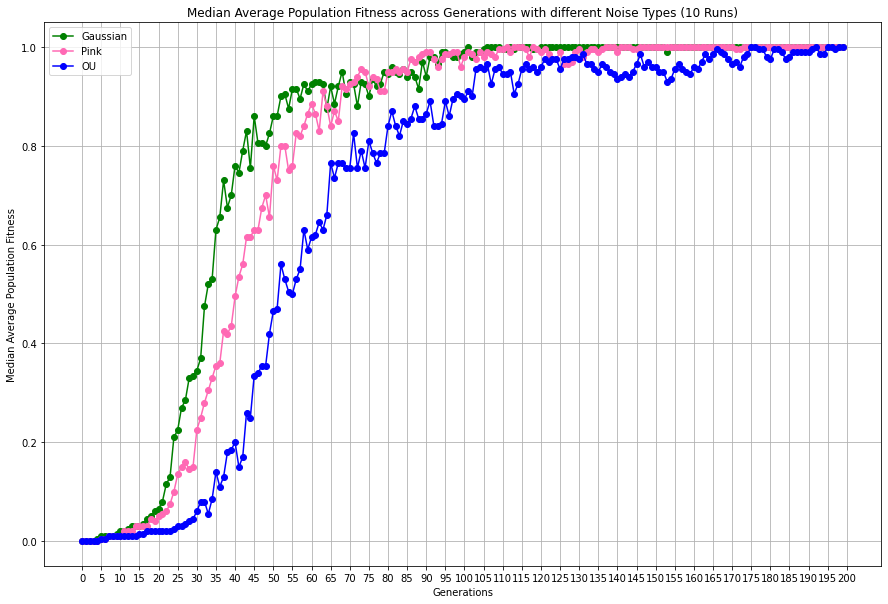

In [9]:
graphResults.display_triple_results(number_of_generations, "Generations", "Median Average Population Fitness", "Median Average Population Fitness across Generations with different Noise Types (10 Runs)",final_data1, final_data2, final_data3)

#### Part 7: Pairwise Mann Whitney U Tests

- checking if the results of using mutation operators Gaussian, OU and pink are significantly different.


In [11]:
import numpy as np
from scipy.stats import mannwhitneyu

# Sample data (performance of algorithms across 10 runs)
gaussian = final_data1
pink = final_data2
ou = final_data3

# Pairwise Mann-Whitney U tests
pairs = [('gaussian', 'pink'), ('gaussian', 'ou'), ('pink', 'ou')]

# Significance level
alpha = 0.01

# Perform U tests for each pair and print results
for alg1, alg2 in pairs:
    data1 = locals()[alg1]
    data2 = locals()[alg2]
    stat, p_value = mannwhitneyu(data1, data2, alternative='two-sided')
    
    print(f"Comparison: {alg1} vs {alg2}")
    print(f"P-Value: {p_value}")
    
    # Check for statistical significance
    if p_value < alpha:
        print("Result: Statistically significant difference.\n")
    else:
        print("Result: No statistically significant difference.\n")


Comparison: gaussian vs pink
P-Value: 0.10852916956224021
Result: No statistically significant difference.

Comparison: gaussian vs ou
P-Value: 4.571993179122224e-11
Result: Statistically significant difference.

Comparison: pink vs ou
P-Value: 1.2793028969399484e-08
Result: Statistically significant difference.



#### Part 8: Implementing GA-MSM (with different noise types)

- GA-MSM was tested under the same conditions.

#### Part 8.1 GA-MSM with Gaussian Noise

In [12]:
from GA_MSM_algorithm import GAMSM

noise_type = "gaussian"

all_run_data1 = []

start_time = time.time()

# 10 runs are performed
for i in range(number_of_runs):

    print("Run Number: ", i+1)
    GAMSM_with_Gaussian_noise = GAMSM(number_of_additional_mutations, population_number, elite_percentage, noise_type, number_of_generations, 1)
    GAMSM_with_Gaussian_noise.run() # results stores average of each generation - 200 average scores stored
    all_run_data1.append(GAMSM_with_Gaussian_noise.average_population_fitness)

end_time = time.time()

total_time = end_time - start_time
hours, minutes = divmod(total_time // 60, 60)
print(f"\nOverall Runtime: {int(hours)} hours and {int(minutes)} minutes.")

Run Number:  1
Total Runtime: 0 hours and 4 minutes.
Run Number:  2
Total Runtime: 0 hours and 3 minutes.
Run Number:  3
Total Runtime: 0 hours and 4 minutes.
Run Number:  4
Total Runtime: 0 hours and 4 minutes.
Run Number:  5
Total Runtime: 0 hours and 4 minutes.
Run Number:  6
Total Runtime: 0 hours and 4 minutes.
Run Number:  7
Total Runtime: 0 hours and 4 minutes.
Run Number:  8
Total Runtime: 0 hours and 4 minutes.
Run Number:  9
Total Runtime: 0 hours and 5 minutes.
Run Number:  10
Total Runtime: 0 hours and 4 minutes.

Overall Runtime: 0 hours and 44 minutes.


#### Saving Results (Gaussian)

In [13]:
import pandas as pd

df1 = pd.DataFrame(all_run_data1)

with pd.ExcelWriter('Gaussian_FrozenLake_GAMSM.xlsx', engine='openpyxl') as writer:
    df1.to_excel(writer, sheet_name='Sheet1', index=False, header=False)

print("Excel file 'Gaussian_FrozenLake_GAMSM.xlsx' created successfully.")

Excel file 'Gaussian_FrozenLake_GAMSM.xlsx' created successfully.


#### Part 8.2 GA-MSM with Pink Noise

In [14]:
from GA_MSM_algorithm import GAMSM

noise_type = "pink"

all_run_data2 = []

start_time = time.time()

# 10 runs are performed
for i in range(number_of_runs):

    print("Run Number: ", i+1)
    GAMSM_with_Pink_noise = GAMSM(number_of_additional_mutations, population_number, elite_percentage, noise_type, number_of_generations, 1)
    GAMSM_with_Pink_noise.run() # results stores average of each generation - 200 average scores stored
    all_run_data2.append(GAMSM_with_Pink_noise.average_population_fitness)

end_time = time.time()

total_time = end_time - start_time
hours, minutes = divmod(total_time // 60, 60)
print(f"\nOverall Runtime: {int(hours)} hours and {int(minutes)} minutes.")

Run Number:  1
Total Runtime: 0 hours and 4 minutes.
Run Number:  2
Total Runtime: 0 hours and 4 minutes.
Run Number:  3
Total Runtime: 0 hours and 5 minutes.
Run Number:  4
Total Runtime: 0 hours and 3 minutes.
Run Number:  5
Total Runtime: 0 hours and 4 minutes.
Run Number:  6
Total Runtime: 0 hours and 4 minutes.
Run Number:  7
Total Runtime: 0 hours and 4 minutes.
Run Number:  8
Total Runtime: 0 hours and 3 minutes.
Run Number:  9
Total Runtime: 0 hours and 3 minutes.
Run Number:  10
Total Runtime: 0 hours and 4 minutes.

Overall Runtime: 0 hours and 43 minutes.


#### Saving Results (Pink)

In [15]:
import pandas as pd

df2 = pd.DataFrame(all_run_data2)

with pd.ExcelWriter('Pink_FrozenLake_GAMSM.xlsx', engine='openpyxl') as writer:
    df2.to_excel(writer, sheet_name='Sheet1', index=False, header=False)

print("Excel file 'Pink_FrozenLake_GAMSM.xlsx' created successfully.")

Excel file 'Pink_FrozenLake_GAMSM.xlsx' created successfully.


#### Part 8.3 GA-MSM with OU Noise

In [16]:
from GA_MSM_algorithm import GAMSM

noise_type = "ou"

all_run_data3 = []

start_time = time.time()

# 10 runs are performed
for i in range(number_of_runs):

    print("Run Number: ", i+1)
    GAMSM_with_OU_noise = GAMSM(number_of_additional_mutations, population_number, elite_percentage, noise_type, number_of_generations, 1)
    GAMSM_with_OU_noise.run() # results stores average of each generation - 200 average scores stored
    all_run_data3.append(GAMSM_with_OU_noise.average_population_fitness)

end_time = time.time()

total_time = end_time - start_time
hours, minutes = divmod(total_time // 60, 60)
print(f"\nOverall Runtime: {int(hours)} hours and {int(minutes)} minutes.")

Run Number:  1
Total Runtime: 0 hours and 10 minutes.
Run Number:  2
Total Runtime: 0 hours and 11 minutes.
Run Number:  3
Total Runtime: 0 hours and 10 minutes.
Run Number:  4
Total Runtime: 0 hours and 11 minutes.
Run Number:  5
Total Runtime: 0 hours and 10 minutes.
Run Number:  6
Total Runtime: 0 hours and 10 minutes.
Run Number:  7
Total Runtime: 0 hours and 10 minutes.
Run Number:  8
Total Runtime: 0 hours and 11 minutes.
Run Number:  9
Total Runtime: 0 hours and 11 minutes.
Run Number:  10
Total Runtime: 0 hours and 10 minutes.

Overall Runtime: 1 hours and 50 minutes.


#### Saving Results (OU)

In [17]:
import pandas as pd

df3 = pd.DataFrame(all_run_data3)

with pd.ExcelWriter('OU_FrozenLake_GAMSM.xlsx', engine='openpyxl') as writer:
    df3.to_excel(writer, sheet_name='Sheet1', index=False, header=False)

print("Excel file 'OU_FrozenLake_GAMSM.xlsx' created successfully.")

Excel file 'OU_FrozenLake_GAMSM.xlsx' created successfully.


#### Part 9. Calculating Results

In [18]:
# calculating medians

import pandas as pd

df1 = pd.read_excel("Gaussian_FrozenLake_GAMSM.xlsx", sheet_name='Sheet1', header=None)
df2 = pd.read_excel("Pink_FrozenLake_GAMSM.xlsx", sheet_name='Sheet1', header=None)
df3 = pd.read_excel("OU_FrozenLake_GAMSM.xlsx", sheet_name='Sheet1', header=None)

all_run_data1 = df1.values.tolist()
all_run_data2 = df2.values.tolist()
all_run_data3 = df3.values.tolist()

median_array = []
final_data1 = []
final_data2 = []
final_data3 = []

# Gaussian
for gen in range(number_of_generations):
    for run_number in range(number_of_runs):
         median_array.append(all_run_data1[run_number][gen])
    final_data1.append(np.median(median_array))
    median_array = []

median_array = []

# Pink
for gen in range(number_of_generations):
    for run_number in range(number_of_runs):
         median_array.append(all_run_data2[run_number][gen])
    final_data2.append(np.median(median_array))
    median_array = []

median_array = []

# OU
for gen in range(number_of_generations):
    for run_number in range(number_of_runs):
         median_array.append(all_run_data3[run_number][gen])
    final_data3.append(np.median(median_array))
    median_array = []

#### Part 10. Displaying Results

In [19]:
from prettytable import PrettyTable

table = PrettyTable()

print("Median Scores For Each Generation Across 10 Runs with Different Noise Types")

table.field_names = ["Generation Number", "Median Scores - Gaussian", "Median Scores - Pink", "Median Scores - OU"]

for i in range(200):
    table.add_row([i + 1, round(final_data1[i],2), round(final_data2[i],2), round(final_data3[i],2) ])

print(table)

Median Scores For Each Generation Across 10 Runs with Different Noise Types
+-------------------+--------------------------+----------------------+--------------------+
| Generation Number | Median Scores - Gaussian | Median Scores - Pink | Median Scores - OU |
+-------------------+--------------------------+----------------------+--------------------+
|         1         |           0.0            |         0.0          |        0.0         |
|         2         |           0.0            |         0.0          |        0.0         |
|         3         |           0.0            |         0.0          |        0.0         |
|         4         |           0.0            |         0.0          |        0.0         |
|         5         |           0.01           |         0.0          |        0.0         |
|         6         |           0.01           |         0.0          |        0.0         |
|         7         |           0.01           |         0.0          |        0.0     

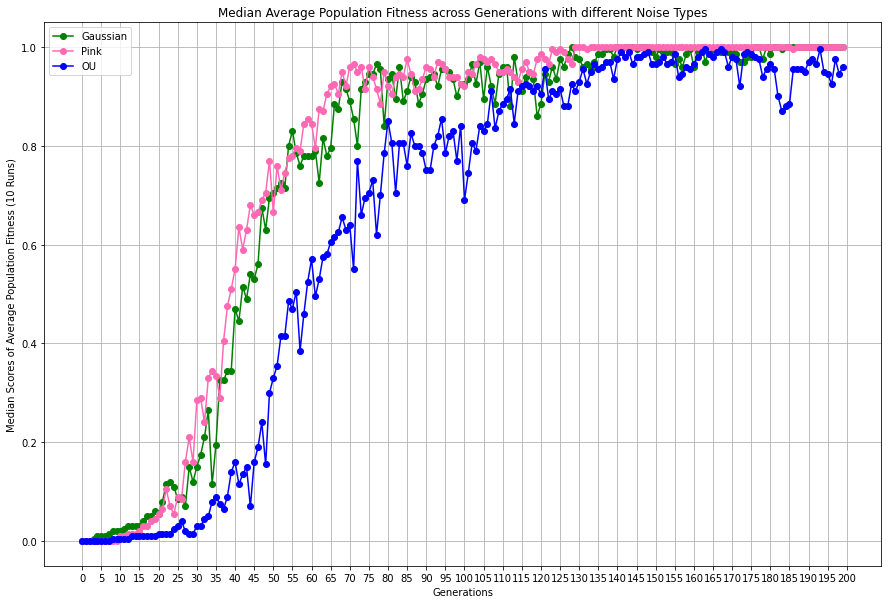

In [20]:
graphResults.display_triple_results(number_of_generations, "Generations", "Median Scores of Average Population Fitness (10 Runs)", "Median Average Population Fitness across Generations with different Noise Types",final_data1, final_data2, final_data3)

#### Part 11. Pairwise Mann Whitney U Tests

In [22]:
import numpy as np
from scipy.stats import mannwhitneyu

# Sample data (performance of algorithms across 10 runs)
gaussian = final_data1
pink = final_data2
ou = final_data3

# Pairwise Mann-Whitney U tests
pairs = [('gaussian', 'pink'), ('gaussian', 'ou'), ('pink', 'ou')]

# Significance level
alpha = 0.01

# Perform U tests for each pair and print results
for alg1, alg2 in pairs:
    data1 = locals()[alg1]
    data2 = locals()[alg2]
    stat, p_value = mannwhitneyu(data1, data2, alternative='two-sided')
    
    print(f"Comparison: {alg1} vs {alg2}")
    print(f"P-Value: {p_value}")
    
    # Check for statistical significance
    if p_value < alpha:
        print("Result: Statistically significant difference.\n")
    else:
        print("Result: No statistically significant difference.\n")


Comparison: gaussian vs pink
P-Value: 0.023508040823817432
Result: No statistically significant difference.

Comparison: gaussian vs ou
P-Value: 2.0297499986194218e-06
Result: Statistically significant difference.

Comparison: pink vs ou
P-Value: 3.708658457498849e-10
Result: Statistically significant difference.

